In [198]:
from sympy import symbols 
from sympy import exp, cos, pi
import math as m
import numpy as np
%matplotlib inline

In [2]:
(m.sqrt(3))**2

2.9999999999999996

In [3]:
# Numbers cannot be represented exactly
0.1+ 0.2 

0.30000000000000004

In [4]:
bin(3)

'0b11'

In [6]:
bin(-175)

'-0b10101111'

## Machine epsilon

In [7]:
7./3 - 4./3 -1

2.220446049250313e-16

In [10]:
print(np.finfo(float).eps)
# 2.22044604925e-16

print(np.finfo(np.float32).eps)
# 1.19209e-07

2.220446049250313e-16
1.1920929e-07


# Cumulative effect

In [36]:
x1 = np.single(0.00001)
y1 = np.double(0.00001)

In [37]:
xt, yt = 0, 0
for i in range(10**5):
    xt+= x1
    yt+= y1
xt, yt

(0.9999999747378752, 0.9999999999980838)

# Taylor

In [38]:
x = symbols('x')

In [39]:
def series(func, n, x0=0):
    """n is the order of the series, x0 where to evaluate it on"""
    return func.series(x, x0, n).removeO()

In [40]:
series(exp(x), 5)

x**4/24 + x**3/6 + x**2/2 + x + 1

In [41]:
def series_value(func, x_val, n, x0=0):
    return series(func, n, x0=x0).subs({x:x_val})

Considering that $e^{0.5} = 1.648721$

In [42]:
around   = 0.5
order    = 10

expr     = exp(x)
true_val = m.exp(around)



print('term\t error \t \t \t approx \n')
for i in range(1, order):
    approx = series_value( expr, around, i)
    print ('term=%d\t'%i, (true_val -approx)/true_val*100, '\t', approx)

term	 error 	 	 	 approx 

term=1	 39.3469340287367 	 1
term=2	 9.02040104310499 	 1.50000000000000
term=3	 1.43876779669707 	 1.62500000000000
term=4	 0.175162255629090 	 1.64583333333333
term=5	 0.0172115629955869 	 1.64843750000000
term=6	 0.00141649373223802 	 1.64869791666667
term=7	 0.000100237960297884 	 1.64871961805556
term=8	 6.21969087455084e-6 	 1.64872116815476
term=9	 3.43549035592512e-7 	 1.64872126503596


# Exp(10), Exp(-10)

In [60]:
x_val   = 5.0
order   = 30
expr = exp(x)

true_val= m.exp(x_val)

for i in range(1, order):
    approx = float(series_value(expr, x_val, i))
    print ('term=%d\t'%i, 'exact: %6.7f \t approx: %6.7f \t error:'%(true_val, approx), (true_val -approx)/true_val*100)
    
#for -10, what's happening with the sign in exp(), could be negative?

term=1	 exact: 148.4131591 	 approx: 1.0000000 	 error: 99.32620530009146
term=2	 exact: 148.4131591 	 approx: 6.0000000 	 error: 95.95723180054871
term=3	 exact: 148.4131591 	 approx: 18.5000000 	 error: 87.5347980516919
term=4	 exact: 148.4131591 	 approx: 39.3333333 	 error: 73.49740847026384
term=5	 exact: 148.4131591 	 approx: 65.3750000 	 error: 55.95067149347875
term=6	 exact: 148.4131591 	 approx: 91.4166667 	 error: 38.40393451669368
term=7	 exact: 148.4131591 	 approx: 113.1180556 	 error: 23.781653702706127
term=8	 exact: 148.4131591 	 approx: 128.6190476 	 error: 13.337167407000727
term=9	 exact: 148.4131591 	 approx: 138.3071677 	 error: 6.8093634721848595
term=10	 exact: 148.4131591 	 approx: 143.6894566 	 error: 3.1828057306204913
term=11	 exact: 148.4131591 	 approx: 146.3806010 	 error: 1.3695268598383081
term=12	 exact: 148.4131591 	 approx: 147.6038485 	 error: 0.5453091913009468
term=13	 exact: 148.4131591 	 approx: 148.1135350 	 error: 0.20188516274370644
term=14	 

# HW: $e^{-x}= \frac{1}{e^x} = \frac{1}{1+x+\frac{x^2}{2}+ \frac{x^3}{3!}\cdots}$ 

# Quadratic eqn

solns : x1=-0.001, x2=-3000

In [115]:
a, b, c = 1, 3000.001, 3

In [116]:
y1 = (-b + m.sqrt(b**2 - 4*a*c))/(2*a)
y1

-0.0009999999999763531

In [117]:
y2 = (-b - m.sqrt(b**2 - 4*a*c))/(2*a)
y2

-3000.0

or, for $b^2 \gg 4ac$, better use

$\frac{-2c}{b\pm \sqrt{b^2 - 4ac}}$

In [118]:
z1 = -2*c/(b + m.sqrt(b**2 - 4*a*c))
z1

-0.001

# HW:

Use Taylor expansion to approximate f(x)=cos(x) at $x_{i+1}=\pi/3$,
on the basis $x_i=\pi/4$

How many terms do we need to achive $\epsilon_t \sim 10^{-6}$

In [130]:
expr = cos(x)
around = pi/3

series(expr, 3, pi/4)

-sqrt(2)*(x - pi/4)**2/4 - sqrt(2)*(x - pi/4)/2 + sqrt(2)/2

In [131]:
for i in range(7):
    approx = series_value(expr, around, i+1, x0=pi/4)
    print ('order n %d\t'%i, (1 - (approx/expr.evalf(subs={x:pi/3})).evalf())*100)

order n 0	 -41.4213562373095
order n 1	 -4.39733175265646
order n 2	 0.449101719314993
order n 3	 0.0261706139911833
order n 4	 -0.00151016212257549
order n 5	 -6.08000744861670e-5
order n 6	 2.44027499318733e-6


# Taylor polynomial

In [132]:
expr = -0.1*x**4 - 0.15*x**3 - 0.5*x**2 - 0.25*x + 1.2

In [133]:
series(expr, 3)

-0.5*x**2 - 0.25*x + 1.2

In [134]:
import matplotlib.pyplot as plt

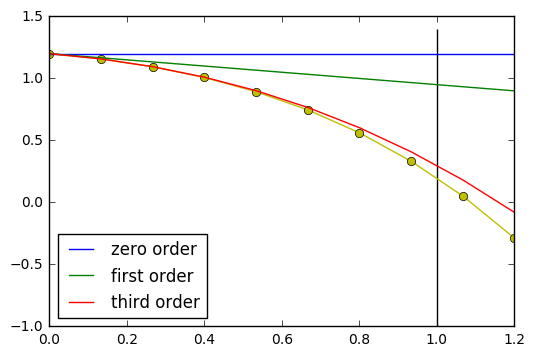

In [135]:
h = np.linspace(0,1.2, 10)
y = [expr.subs({x:i}) for i in h]
plt.plot(h, y, 'yo-')

y1 = [series(expr, 1).subs({x:i}) for i in h]
plt.plot(h, y1, label='zero order')

y2 = [series(expr, 2).subs({x:i}) for i in h]
plt.plot(h, y2, label='first order')

y3 = [series(expr, 4).subs({x:i}) for i in h]
plt.plot(h, y3, label='third order')

plt.vlines(1,-1, 1.4)
plt.legend(loc='best')
plt.show()

In [146]:
y = lambda x: -0.1*x**4 - 0.15*x**3 - 0.5*x**2 - 0.25*x + 1.2
yder = lambda x : -0.4*x**3 - 0.45*x**2 - 1.0*x - 0.25

In [147]:
x = np.linspace(0,1.0, 10)

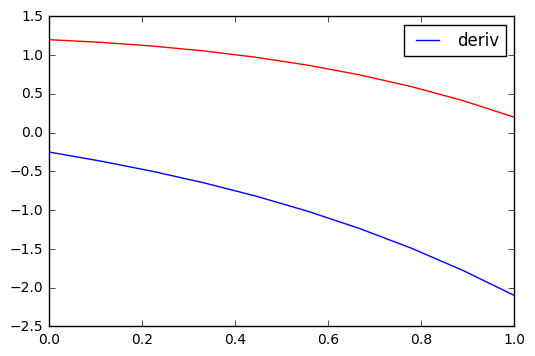

In [150]:
plt.plot(x, y(x), 'r')
plt.plot(x, yder(x), label='deriv')
plt.legend()
plt.show()

In [149]:
yder(0.5)

-0.9125

In [154]:
def derivative(x0, h):
    xni, xi, xpi = x0-h, x0, x0+h
    fni, fi, fpi = y(xni), y(xi), y(xpi)
    
    dforward  = (fpi - fi)/h
    dbackward = (fi - fni)/h
    dcenterd  = (fpi - fni)/(2*h)
    
    return dforward, dbackward, dcenterd

In [193]:
x0, h= 0.5, 0.01  #0.000000001
derivative(x0, h) 

(-0.9212850999999911, -0.9037849000000042, -0.9125349999999977)

In [194]:
for i in derivative(x0, h):
    print('Error (%):', (i - yder(x0))/yder(x0)*100)

Error (%): 0.9627506849305325
Error (%): -0.9550794520543295
Error (%): 0.0038356164381014553
